## Galactic Dynamo Diffusion Equation using Crank Nicholson

### Overview
This notebook will illustrate the crank nicholson difference method solving Galactic Dynamo Diffusion Equation.

### Mean Field Dynamos

The mean-field dynamo equation describes the generation of a magnetic field in a turbulent conducting fluid. The general form of the mean-field dynamo equation, neglecting the alpha effect, velocity terms, and assuming the diffusion coefficient is scalar, along with the condition that the divergence of the magnetic field ($ \nabla \cdot \mathbf{B} = 0 $), is given by:

$$
\frac{\partial \bar{\mathbf{B}}}{\partial t} = \nabla \times (\bar{\mathbf{v}} \times \bar{\mathbf{B}}) + \eta \nabla^2 \bar{\mathbf{B}}
$$

Where:
- $ \bar{\mathbf{B}} $ is the magnetic field vector.
- $ \bar{\mathbf{v}} $ is the velocity vector of the conducting fluid.
- $ \eta $ is the magnetic diffusion coefficient.
- $ \nabla \times (\bar{\mathbf{v}} \times \bar{\mathbf{B}}) $ represents the stretching and folding of the magnetic field lines due to the fluid motion.
- $ \eta \nabla^2 \bar{\mathbf{B}} $ represents the diffusion of the magnetic field.

Neglecting the alpha effect and the stretching term ($ \bar{\mathbf{v}} \times \bar{\mathbf{B}} $) and considering a scalar diffusion coefficient with $ \nabla \cdot \mathbf{B} = 0 $, the simplified mean-field dynamo equation becomes:

$$
\frac{\partial \bar{\mathbf{B}}}{\partial t} = \eta \nabla^2 \bar{\mathbf{B}}
$$

This equation describes the evolution of the magnetic field solely due to diffusion, without any contribution from fluid motion or turbulent effects.

For the radial component ( $B_r$ ):
$$
\frac{\partial \bar{B}_r}{\partial t} = \eta \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial \bar{B}_r}{\partial r} \right) - \frac{Br}{r^2}+ \frac{\partial^2 \bar{B}_r}{\partial z^2} \right)
$$

For the azimuthal component ($ B_{\phi}$ ):
$$
\frac{\partial \bar{B}_\phi}{\partial t} = \eta \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial \bar{B}_\phi}{\partial r} \right) - \frac{B_{\phi}}{r^2} + \frac{\partial^2 \bar{B}_\phi}{\partial z^2} \right)
$$

For the axial component ($ B_z $):
$$
\frac{\partial \bar{B}_z}{\partial t} = \eta \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial \bar{B}_z}{\partial r} \right) - \frac{B_z}{r^2} + \frac{\partial^2 \bar{B}_z}{\partial z^2} \right)
$$

These spiral galxies can be approximated as a spatially symmetric thin disc where $ \frac{\partial}{\partial \phi} = 0 $. Also, observe $B_z$  is much weaker than  $ B_r $ and $ B_\phi $, we can neglect $ B_z $ in equations for $ B_r $ and $ B_\phi $. Thus, we focus on solving Eq. (11.2a) and (11.2b). Alternatively, \( B_z \) can be determined from the solenoidality condition $ \nabla \cdot \mathbf{B} = 0 $ as soon as $ B_r $ and $ B_{\phi} $ have been solved for.


The implicit Crank-Nicolson difference equation for $ B_r $ and $ B_\phi $ is derived by discretizing the equation

\begin{equation}
\frac{\partial B_{r,ij+\frac{1}{2}}}{\partial t} = \eta \frac{\partial^2 B_{r,ij+\frac{1}{2}}}{\partial z^2},
\end{equation}

around $ (z_i,t_{j+\frac{1}{2}}) $ giving the difference equation

\begin{equation}
\frac{B_{ij+1}-B_{ij}}{k} = \frac{\eta}{2} \left( \frac{B_{ij+1}-2B_{ij}+B_{ij-1}}{h^2} + \frac{B_{i+1j+1}-2B_{i+1j}+B_{i+1j-1}}{h^2} \right),
\end{equation}

where $ B_{ij} $ represents $ B_r $ or $ B_\phi $ at the spatial grid point $ (z_i,t_{j}) $, $ k $ is the time step, $ h $ is the grid spacing in the $ z $ direction, and $ \eta $ is the diffusion coefficient. 

Rearranging the equation, we get

\begin{equation}
-\alpha B_{i-1j+1} + (2+2r)B_{ij+1} - rB_{i+1j+1} = rB_{i-1j} + (2-2r)B_{ij} + rB_{i+1j}
\end{equation}

for \( i=1,...,9 \), where $ \alpha = \frac{k \eta}{h^2} $. This is the correct way of discretizing the equation and removing the \( r \) terms.


In [1]:
# LIBRARY
# vector manipulation and matrix manipulation from external LIBRARY is allowed.
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import tabulate
from matplotlib.animation import FuncAnimation
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams

# Set custom style parameters
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = '--'
rcParams['grid.alpha'] = 0.5

In [13]:
N = 20
Nt = 400
h = 1 / N
k = 2 / Nt
r = k / (h * h)
time_steps = 100
time = np.arange(0, (time_steps + 0.5) * k, k)
z = np.arange(-0.001, 7.0001, h)  # Points including ghost zones
Z, Y = np.meshgrid(z, time)

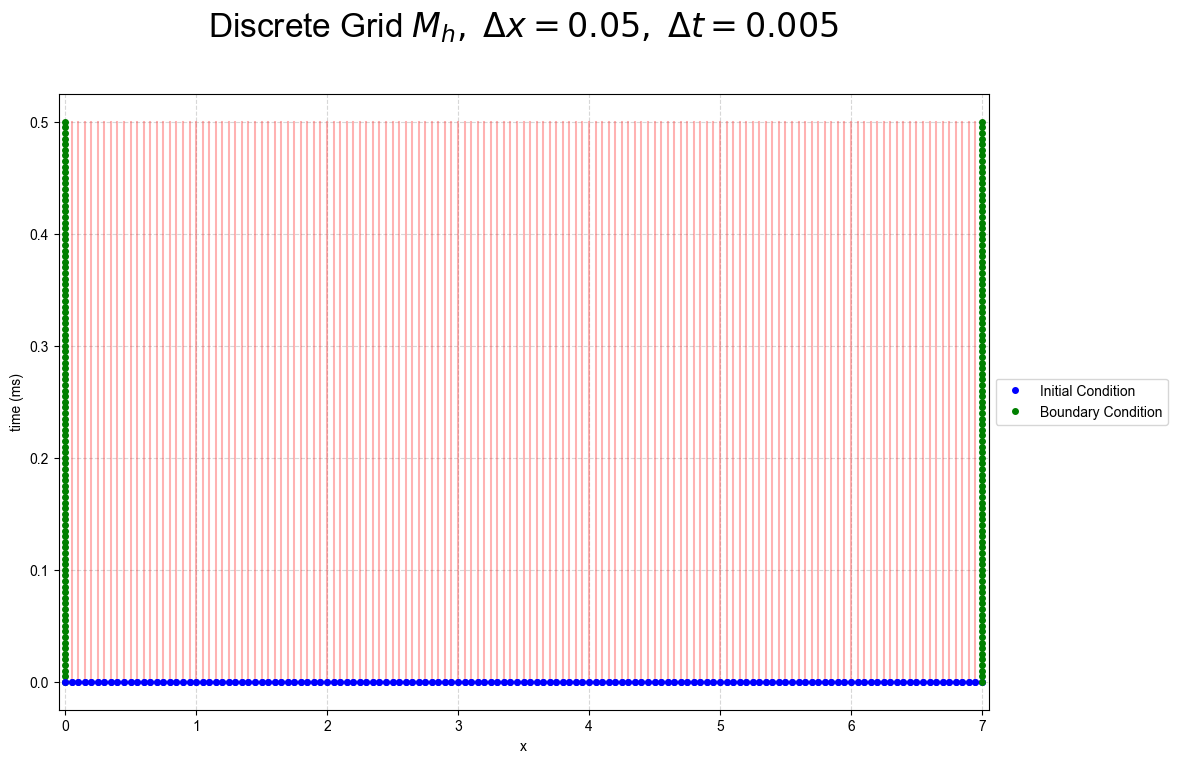

In [15]:
fig = plt.figure(figsize=(12, 8))
plt.plot(Z, Y, 'r-', alpha=0.3)  
plt.plot(z, 0 * z, 'bo', markersize=4, label='Initial Condition')  
plt.plot(np.ones(time_steps + 1) * 0, time, 'go', markersize=4, label='Boundary Condition')  
plt.plot(z, 0 * z, 'bo', markersize=4)
plt.plot(np.ones(time_steps + 1) * 7, time, 'go', markersize=4)
plt.xlim((-0.05, 7.05))  
plt.xlabel('x')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $M_h,$ $\Delta x= %s,$ $\Delta t=%s$' % (h, k), fontsize=24, y=1.08)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("seed_25_(25,25)/grid.pdf")
plt.show()

The boundary conditions at |z| = h  for a disc-shaped magnetized system are derived from the requirement of continuity of the magnetic field components across the boundary. Specifically, assuming no electric current sheets, the transverse components  $B_r$  and $B_{\phi}$  must be continuous at  |z| = h , which leads to  $B_{\phi}$ = 0  and  $B_r \approx 0$  at  $z = \pm h$ .

These conditions, known as the vacuum boundary conditions, are exact due to the axial symmetry and potential structure of the outer magnetic field. The second boundary condition is approximate and becomes more accurate as the disc becomes thinner. These conditions are commonly employed in semi-analytic galactic dynamo models.

In the case of a slab surrounded by a medium of infinite electrical conductivity, where the field diffusion across the slab's surface is suppressed ($ \sigma = 0 $), the boundary conditions become $ \frac{\partial B_r}{\partial z} = \frac{\partial B_\phi}{\partial z} = 0 $ at $ |z| = h $. This scenario is discussed in the works of Parker (1971a) and Choudhuri (1984).


## Discrete Initial and Boundary Conditions

### `Vacuum Boundary Conditions`
The discrete initial conditions are 
\begin{equation} B[i,0]= B_o cos(\gamma z[i]) \end{equation}
and the discrete boundary conditions are 

\begin{equation} B[0,j]=0,  B[N,j]=0, \end{equation}

\begin{equation} \frac{\partial B[0,j]}{\partial z} = \frac{\partial B[N,j]}{\partial z} = 0 \end{equation}


where $B[i,j]$ is the numerical approximation of $B(x[i],t[j])$. The Figure below plots values of $B[i,0]$ for the initial (blue) and boundary (red) conditions for $t[0]=0.$

In [16]:
def generate_random_Bo(seed_value):
    np.random.seed(seed_value)  
    random_float = np.random.rand()  
    return random_float

def initial_conditions(N, time_steps, seed_value, k, BCtype = "vacuum"):
    mag_br = generate_random_Bo(seed_value)
    mag_bphi = generate_random_Bo(seed_value + 1)  
    
    r = np.linspace(-1, 1, N+1)
    Br = np.zeros((N+1, time_steps+1))
    Bphi = np.zeros((N+1, time_steps+1))
    b1 = np.zeros(N-1)
    b2 = np.zeros(N-1)
    
    # Initial Condition for Br and Bphi
    for i in range(1, N+1):
        Br[i, 0] = mag_br * ((np.sin(k * r[i])/r[i]**2) - (np.cos(k *r[i])/r[i]))
        Bphi[i, 0] = -mag_bphi * ((np.cos(k * r[i])/r[i]**2) + (np.sin(k *r[i])/r[i]))
    
    # Boundary Condition
    if BCtype == "vacuum":
        Br[0, :] = 0
        Bphi[0, :] = 0
        Br[N, :] = 0
        Bphi[N, :] = 0

    return z, Br, Bphi, b1, b2, mag_br, mag_bphi

In [17]:
seed_value = 20
k = 2
z, Br, Bphi, b1, b2, mag_br, mag_bphi = initial_conditions(N, time_steps, seed_value, k)

ValueError: x and y must have same first dimension, but have shapes (141,) and (21,)

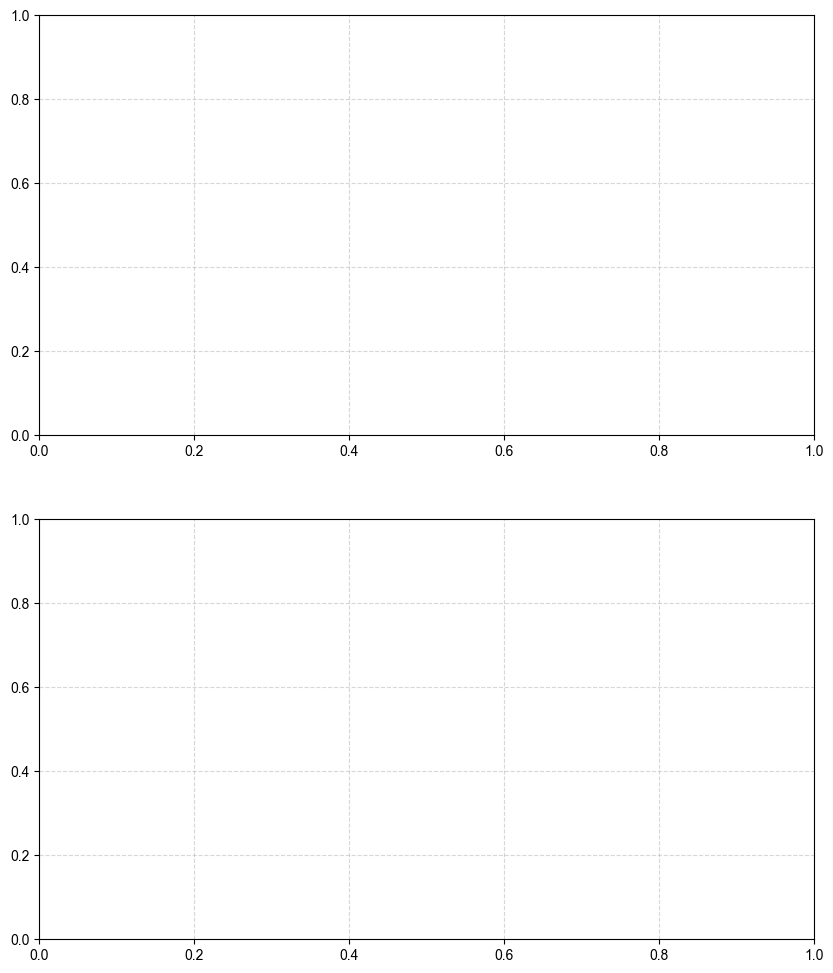

In [18]:
fig, axs = plt.subplots(2, figsize=(10, 12))

axs[0].plot(z, Br[:, 0], label=f'Initial Condition (Br, mag={mag_br:.2f})', color='blue')
axs[0].plot(z, Bphi[:,0], label=f'Initial Condition (Bphi, mag={mag_bphi:.2f})', color='orange')
axs[0].plot(z[[0, N]], Br[[0, N], 0], 'go', markersize=8, label='Boundary Condition at t[0]=0')
axs[0].set_title('Initial Conditions for Br and Bphi', fontsize=18)
axs[0].set_xlabel('z', fontsize=14)
axs[0].set_ylabel('Magnitude', fontsize=14)
axs[0].legend(loc='upper right', fontsize=12)
axs[0].grid(True, linestyle='--', alpha=0.5)


norm_Br_Bphi = [np.linalg.norm(np.sqrt(Br[i, 0]**2 + Bphi[:,0]**2)) for i in range(len(z))]
axs[1].plot(z, norm_Br_Bphi , label='Norm of (Br, Bphi)', linestyle='--', color='green')
axs[1].set_title('Norm of (Br, Bphi)', fontsize=18)
axs[1].set_xlabel('z', fontsize=14)
axs[1].set_ylabel('Magnitude', fontsize=14)
axs[1].legend(loc='upper right', fontsize=12)
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("seed_25_(25,25)/initial_conditions.pdf")
plt.show()

The implicit Crank-Nicolson difference equation of the Heat Equation is given by:

$$
\frac{U_{i,j+1}-U_{i,j}}{k} =  \frac{1}{2}\left(\frac{U_{i+1j+1}-2U_{ij+1}+U_{i-1j+1}}{h^2}+\frac{U_{i+1j}-2U_{ij}+U_{i-1j}}{h^2}\right)
$$

Rearranging the equation, we get:

$$
-\alpha U_{i-1j+1} + ( 2 + 2\alpha)U_{ij+1} - \alpha U_{i+1j+1} = \alpha U_{i-1j} + (2-2\alpha)U_{ij} + \alpha U_{i+1j}
$$

for $(i = 1, \ldots, 9)$, where $(\alpha = \frac{k}{h^2})$.


This can be written in matrix form as:

$$
(I/2 + \alpha B)\mathbf{U}_{j} = (I/2 - \alpha B)\mathbf{U}_{j-1}
$$

for which $A$ is a $9 \times 9$ matrix:

$$
(2I + \alpha B) = \begin{pmatrix}
2+2\alpha & -\alpha & 0 & 0 & 0 & 0 & 0 & 0 \\
-\alpha & 2+2\alpha & -\alpha & 0 & 0 & 0 & 0 & 0 \\
0 & -\alpha & 2+2\alpha & -\alpha & 0 & 0 & 0 & 0 \\
0 & 0 & -\alpha & 2+2\alpha & -\alpha & 0 & 0 & 0 \\
0 & 0 & 0 & -\alpha & 2+2\alpha & -\alpha & 0 & 0 \\
0 & 0 & 0 & 0 & -\alpha & 2+2\alpha & -\alpha & 0 \\
0 & 0 & 0 & 0 & 0 & -\alpha & 2+2\alpha & -\alpha \\
0 & 0 & 0 & 0 & 0 & 0 & -\alpha & 2+2\alpha \\
\end{pmatrix}
$$

$B$ is another $9 \times 9$ matrix:

$$
(2I - \alpha B) = \begin{pmatrix}
2-2\alpha & \alpha & 0 & 0 & 0 & 0 & 0 & 0 \\
\alpha & 2-2\alpha & \alpha & 0 & 0 & 0 & 0 & 0 \\
0 & \alpha & 2-2\alpha & \alpha & 0 & 0 & 0 & 0 \\
0 & 0 & \alpha & 2-2\alpha & \alpha & 0 & 0 & 0 \\
0 & 0 & 0 & \alpha & 2-2\alpha & \alpha & 0 & 0 \\
0 & 0 & 0 & 0 & \alpha & 2-2\alpha & \alpha & 0 \\
0 & 0 & 0 & 0 & 0 & \alpha & 2-2\alpha & \alpha \\
0 & 0 & 0 & 0 & 0 & 0 & \alpha & 2-2\alpha \\
\end{pmatrix}
$$

$\mathbf{V}_j$ is a column vector of size 9 containing $V_{ij}$ values, $\mathbf{b}_j$ and $\mathbf{b}_{j+1}$ are column vectors of size 9 representing the boundary conditions for the current and next time steps, respectively.

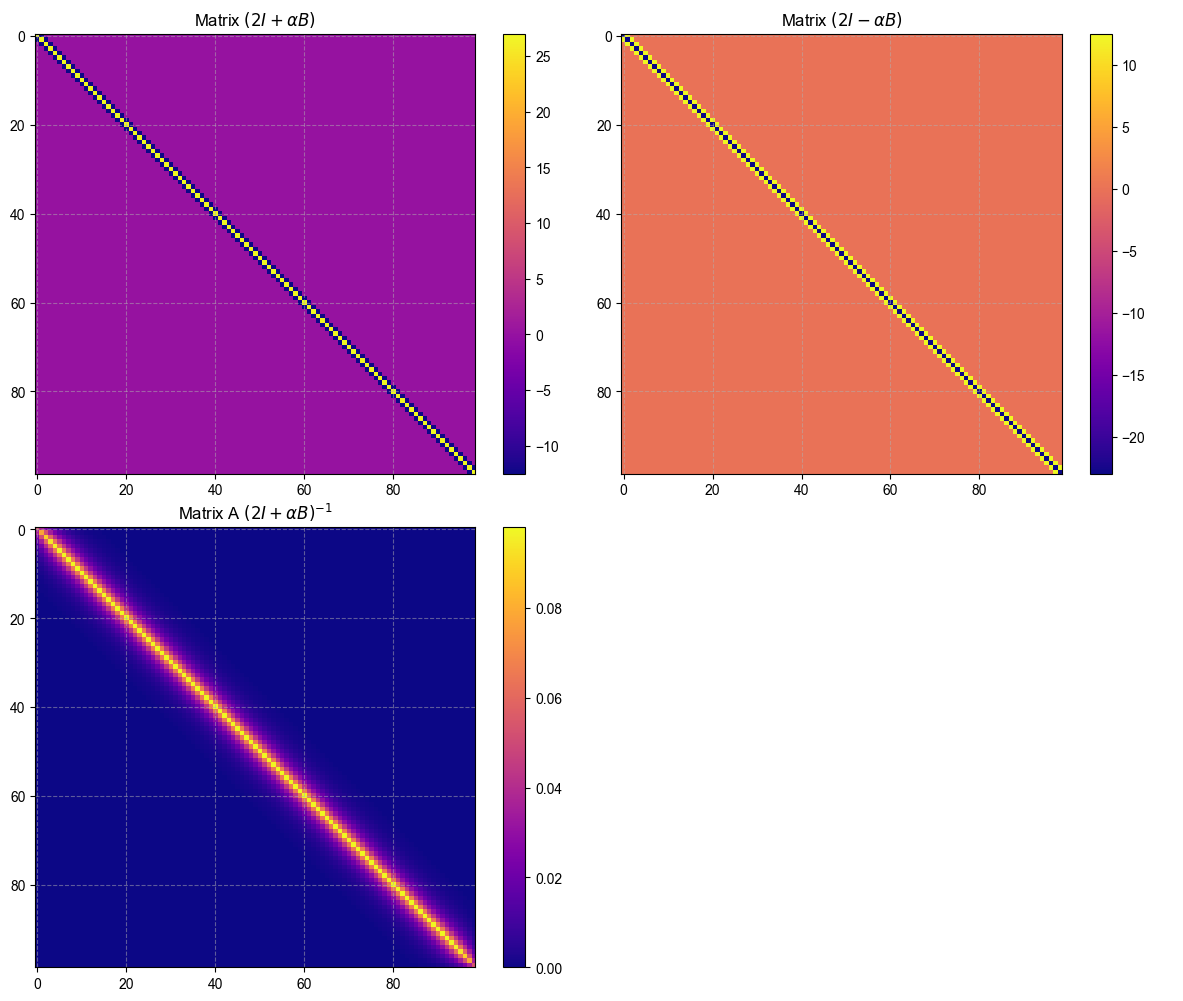

In [7]:
#  A and B
A = np.zeros((N-1, N-1))
B = np.zeros((N-1, N-1))
for i in range(N-1):
    A[i, i] = 2 + 2 * r 
    B[i, i] = 2 - 2 * r * (1 + 1/(i*i))
    if i < N-2:
        A[i, i+1] = -r*(1 + 1/i)
        A[i+1, i] = -r*(1 + 1/i)
        B[i, i+1] = r*(1 + 1/i)
        B[i+1, i] = r*(1 + 1/i)

# inverse of A
A_inv = np.linalg.inv(A)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
im = axs[0, 0].imshow(A, cmap='plasma')
axs[0, 0].set_title(r'Matrix $(2I + \alpha B)$')
plt.colorbar(im, ax=axs[0, 0])
im = axs[0, 1].imshow(B, cmap='plasma')
axs[0, 1].set_title(r'Matrix $(2I - \alpha B)$')
plt.colorbar(im, ax=axs[0, 1])
im = axs[1, 0].imshow(A_inv, cmap='plasma')
axs[1, 0].set_title(r'Matrix A $(2I + \alpha B)^{-1}$')
plt.colorbar(im, ax=axs[1, 0])
axs[1, 1].axis('off')

plt.tight_layout()
plt.savefig("seed_25_(25,25)/matrix_A_B_A_inv.pdf")
plt.show()

In [8]:
for j in range (1,time_steps+1):
    b1[0]=r*Br[0,j-1]+r*Br[0,j]
    b1[N-2]=r*Br[N,j-1]+r*Br[N,j]
    v1=np.dot(B,Br[1:(N),j-1])
    Br[1:(N),j]=np.dot(A_inv,v1+b1)
    b2[0]=r*Bphi[0,j-1]+r*Bphi[0,j]
    b2[N-2]=r*Bphi[N,j-1]+r*Bphi[N,j]
    v2=np.dot(B,Bphi[1:(N),j-1])
    Bphi[1:(N),j]=np.dot(A_inv,v2+b2)

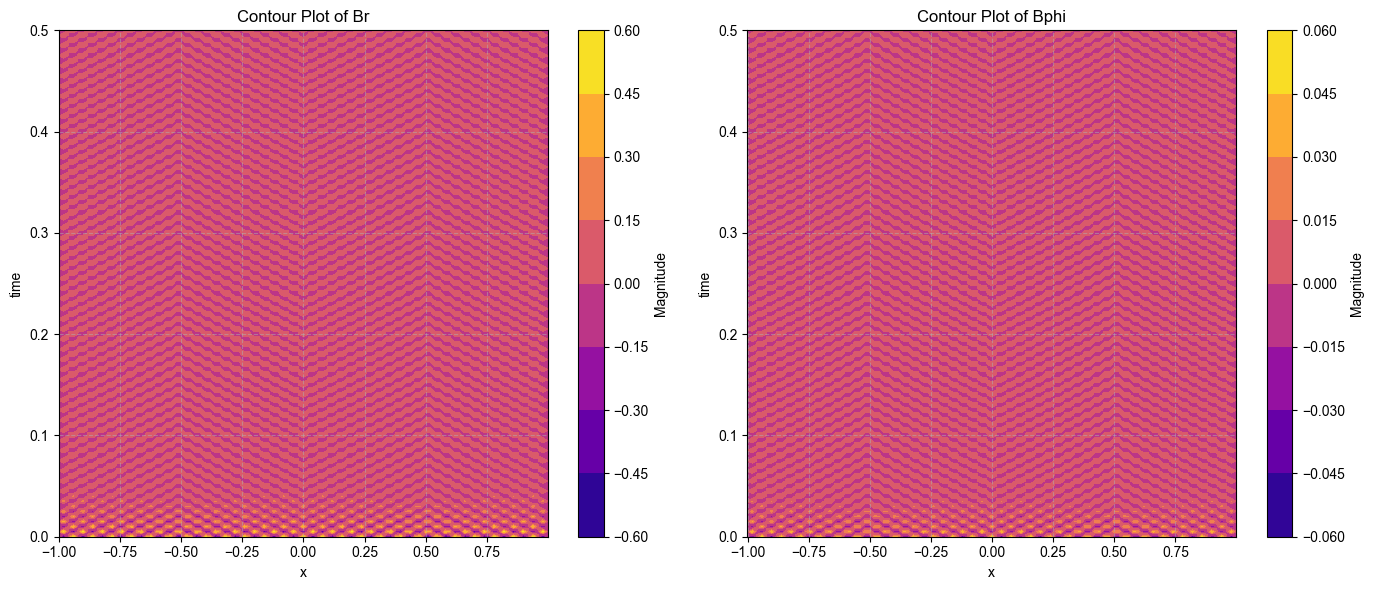

In [9]:
# Plotting Br
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.contourf(Z, Y, Br.transpose(), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.xlabel('x')
plt.ylabel('time')
plt.title('Contour Plot of Br')

# Plotting Bphi
plt.subplot(1, 2, 2)
plt.contourf(Z, Y, Bphi.transpose(), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.xlabel('x')
plt.ylabel('time')
plt.title('Contour Plot of Bphi')

plt.tight_layout()
plt.savefig("seed_25_(25,25)/contour_plot_Br_Bphi.pdf")
plt.show()

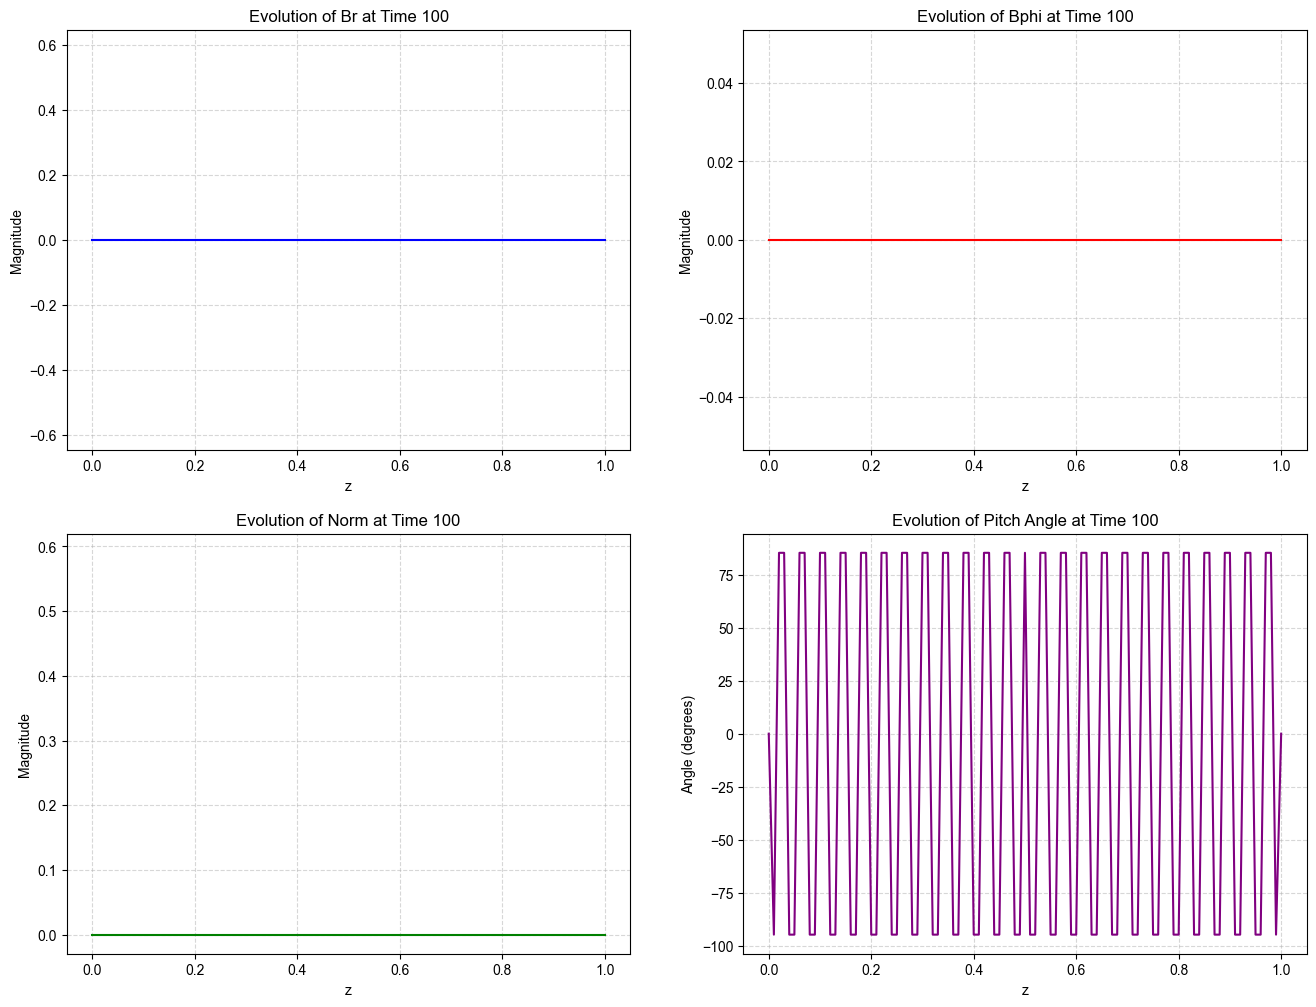

In [10]:
norm_squared_sum = np.sqrt(Br**2 + Bphi**2)
pitch_angle = np.arctan2(Br, Bphi) * (180 / np.pi)

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
# Plot Br
line_br, = axs[0, 0].plot(np.linspace(0, 1, Br.shape[0]), Br[:, 0], color='blue', label='Br')
axs[0, 0].set_xlabel('z')
axs[0, 0].set_ylabel('Magnitude')
axs[0, 0].set_title('Evolution of Br')

# Plot Bphi
line_bphi, = axs[0, 1].plot(np.linspace(0, 1, Bphi.shape[0]), Bphi[:, 0], color='red', label='Bphi')
axs[0, 1].set_xlabel('z')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].set_title('Evolution of Bphi')

# Plot Norm
line_norm, = axs[1, 0].plot(np.linspace(0, 1, norm_squared_sum.shape[0]), norm_squared_sum[:, 0], color='green', label='Norm')
axs[1, 0].set_xlabel('z')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].set_title('Evolution of Norm')


line_pitch, = axs[1, 1].plot(np.linspace(0, 1, pitch_angle.shape[0]), pitch_angle[:, 0], color='purple', label='Pitch Angle')
axs[1, 1].set_xlabel('z')
axs[1, 1].set_ylabel('Angle (degrees)')
axs[1, 1].set_title('Evolution of Pitch Angle')

def update(frame):
    line_br.set_ydata(Br[:, frame])
    axs[0, 0].set_title(f'Evolution of Br at Time {frame}')
    
    line_bphi.set_ydata(Bphi[:, frame])
    axs[0, 1].set_title(f'Evolution of Bphi at Time {frame}')
    
    line_norm.set_ydata(norm_squared_sum[:, frame])
    axs[1, 0].set_title(f'Evolution of Norm at Time {frame}')
    
    line_pitch.set_ydata(pitch_angle[:, frame])
    axs[1, 1].set_title(f'Evolution of Pitch Angle at Time {frame}')
    
    return line_br, line_bphi, line_norm, line_pitch

ani = FuncAnimation(fig, update, frames=range(Br.shape[1]), interval=200)
ani.save('seed_25_(25,25)/Br_Bphi_Norm_Pitch_evolution.gif', writer='pillow')

plt.show()